In [74]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [5]:
class Order:
    def __init__(self, Id, begin, end):
        self.order_id = Id
        self.begin = begin
        self.end = end
        
        self.vialog = 0
        for i in range(self.begin+1, self.end):
            self.vialog = self.vialog + geodesic((df['Latitude'][i],df['Longitude'][i]),
                                                 (df['Latitude'][i-1],df['Longitude'][i-1])).m
        self.time = (df['Time'][end-1] - df['Time'][begin]).seconds

In [6]:
class Driver:
    def __init__(self, Id, begin, end):
        self.driver_id = Id
        self.begin = begin
        self.end = end
        
        self.orders = []
        
        start = self.begin
        order_id = df['Order ID'][start]
        for i in range(self.begin+1, self.end):
            if order_id != df['Order ID'][i]:
                
                if i != start+1: # the time is not zero
                    #print('order id: '+str(order_id)+' begin: '+str(start)+' end: '+str(i))
                    self.orders.append(Order(order_id, start, i))
                    order_id = df['Order ID'][i]
                    start = i
                    
                else: # ignore this order
                    order_id = df['Order ID'][i]
                    start = i
        if self.end != start+1:           
            #print('order id: '+str(order_id)+' begin: '+str(start)+' end: '+str(self.end))
            self.orders.append(Order(order_id, start, self.end))
        
        self.order_num = len(self.orders)
        self.driving_vialog = 0
        self.speed = -1
        self.driving_time = 0
        for order in self.orders:
            self.driving_time += order.time
            self.driving_vialog += order.vialog 
        
        if self.driving_time != 0:
            self.speed = self.driving_vialog/self.driving_time

In [7]:
def create_driver(df):
    count = 0
    driver_id = df['Driver ID'][0]
    begin = 0
    drivers = []
    for i in range(df.shape[0]):
        if driver_id != df['Driver ID'][i]:
            if i % 50 == 1:
                #print('driver begin: '+str(begin)+' end: '+str(i))
                drivers.append(Driver(df['Driver ID'][begin], begin, i))
            # update
            begin = i
            driver_id = df['Driver ID'][i]
    drivers.append(Driver(df['Driver ID'][begin], begin, df.shape[0]))
    return drivers

In [52]:
df = pd.read_csv('/Users/zhehaoyu/Desktop/MCM/模考/D/代码/1/gps_20161107')
df.columns = ['Driver ID','Order ID','Time','Longitude','Latitude']
df['Time'] = pd.to_datetime(df['Time'],unit='s')

In [53]:
drivers = create_driver(df)

In [54]:
speed = 0
tot_time = 0
mileage = 0
order_num = 0

for driver in drivers:
    speed = speed + driver.speed
    tot_time = tot_time + driver.driving_time
    mileage = mileage + driver.driving_vialog
    order_num = order_num + driver.order_num
    
speed = speed/len(drivers)

In [55]:
print('average speed: '+str(speed))
print('total driving time: '+str(tot_time))
print('total mileage: '+str(mileage))
print('number of orders: '+str(order_num))

average speed: 6.119167176511056
total driving time: 3576970
total mileage: 13854862.834181307
number of orders: 4289


In [48]:
alpha = 40
beta = 10
gamma = 15
bcost = 50

In [56]:
rev = alpha*mileage
cost = bcost*order_num + beta*mileage + gamma*tot_time

eff = (rev - cost)/rev
print(rev)
print(eff)

554194513.3672522
0.6527976663415608


In [23]:
efficiency=[]

In [57]:
efficiency.append(eff)

In [58]:
for eff in efficiency:
    print(eff)

0.6488332513433569
0.6427405204623808
0.6253864730081432
0.6478533931142141
0.6453465962261807
0.6477295363937667
0.6527976663415608


In [64]:
a = [0.6527976663415608]+efficiency[:-1]

In [65]:
plt.plot

[0.6527976663415608,
 0.6488332513433569,
 0.6427405204623808,
 0.6253864730081432,
 0.6478533931142141,
 0.6453465962261807,
 0.6477295363937667]

In [68]:
wd = range(1,8)

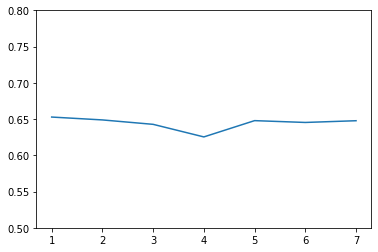

In [78]:
plt.ylim(0.5,0.8)
plt.plot(wd,a)